## Compulsory Task

This task involves creating a Decision Tree that can predict the survival of passengers on the Titanic.

In [24]:
# Importing necessary modules.
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

### Loading the Data

In [25]:
# Reading data from the 'Titanic.csv' file and storing in a dataframe.
df = pd.read_csv('titanic.csv', encoding='unicode_escape')

# Displaying the first 10 rows of dataframe.
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Handling Missing Data

In [26]:
# Selecting relevant variables from the data.
data = df.drop(['PassengerId','Sex','Name','Ticket','Cabin','Embarked'], axis=1)
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [27]:
# Checking for any missing entries in the dataframe.
data.isnull().sum()

Survived      0
Pclass        0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

It is clear that only the 'Age' column has missing entries. These values can be interpolated from the 'Pclass' column.

In [28]:
# Finding the median age for each passenger class
median_age = data.groupby(['Pclass'])['Age'].median()
print(median_age)

# Depending on the passengers class, any missing age values are replaced with the median age for that class.
for passenger_class in data['Pclass']:
    if passenger_class == 1:
        data['Age'].fillna(value=round(median_age[0:1][1]), inplace=True)
    elif passenger_class == 2:
        data['Age'].fillna(value=round(median_age[1:2][2]), inplace=True)
    elif passenger_class == 3:
        data['Age'].fillna(value=round(median_age[2:3][3]), inplace=True)
    else:
        print('Error: Something went wrong...')

data.head(10)

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64


/var/folders/tf/jb3kbn_x7yn1kh8xwwzcqrbc0000gn/T/ipykernel_60789/3824279664.py:12: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  data['Age'].fillna(value=round(median_age[2:3][3]), inplace=True)
/var/folders/tf/jb3kbn_x7yn1kh8xwwzcqrbc0000gn/T/ipykernel_60789/3824279664.py:8: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  data['Age'].fillna(value=round(median_age[0:1][1]), inplace=True)
/var/folders/tf/jb3kbn_x7yn1kh8xwwzcqrbc0000gn/T/ipykernel_60789/3824279664.py:10: FutureWarnin

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
5,0,3,24.0,0,0,8.4583
6,0,1,54.0,0,0,51.8625
7,0,3,2.0,3,1,21.0750
8,1,3,27.0,0,2,11.1333
9,1,2,14.0,1,0,30.0708


### Splitting the Dataset into Training, Development & Test Sets

In [29]:
features = list(data.columns)
features.pop(0)
print(features)

# Storing independent features in 'X' variable.
# Storing dependent features (passengers survival) as 'y' variable.
x = data.iloc[:,[1,2,3,4,5]].values
y = data.iloc[:,0].values

# Reshaping variables to allow for compatibility.
X = x.reshape(-1,5)
Y = y.reshape(-1,1)

# Splitting data into Train and Test Sets.
x_train, X_test, y_train, Y_test = train_test_split(X,Y,test_size=0.3,stratify=Y)

# Further splitting Test Set into Test and Development Sets.
x_test, x_dev, y_test, y_dev = train_test_split(X_test, Y_test, test_size=0.5)

print(f"Training Set Size: {x_train.shape} {y_train.shape}")
print(f"Test Set Size: {x_test.shape} {y_test.shape}")
print(f"Development Set Size: {x_dev.shape} {y_dev.shape}")

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Training Set Size: (623, 5) (623, 1)
Test Set Size: (134, 5) (134, 1)
Development Set Size: (134, 5) (134, 1)


### Training the Decision Tree

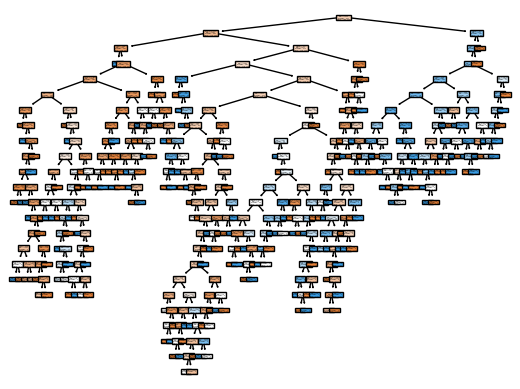

In [30]:
# Fitting the model to the Training Data.
model = DecisionTreeClassifier()
#model.fit(x_test,y_test)
model.fit(x_train, y_train)

# Plotting the Decision Tree.
fig = plt.figure()
tree.plot_tree(model, feature_names =features ,filled=True)
fig.savefig('decision_tree.png')

In [31]:
# Computing the models accuracy on the Development Set.
dev_score = model.score(x_dev,y_dev)
print(f"Development Set Accuracy: {dev_score}")

Development Set Accuracy: 0.6567164179104478


### Analysing the Effects of 'maxdepth' Parameter

Depth: 2 	 Accuracy: 0.6567164179104478
Depth: 3 	 Accuracy: 0.6791044776119403
Depth: 4 	 Accuracy: 0.7089552238805971
Depth: 5 	 Accuracy: 0.7164179104477612
Depth: 6 	 Accuracy: 0.7164179104477612
Depth: 7 	 Accuracy: 0.7313432835820896
Depth: 8 	 Accuracy: 0.7238805970149254
Depth: 9 	 Accuracy: 0.7238805970149254
Depth: 10 	 Accuracy: 0.7238805970149254


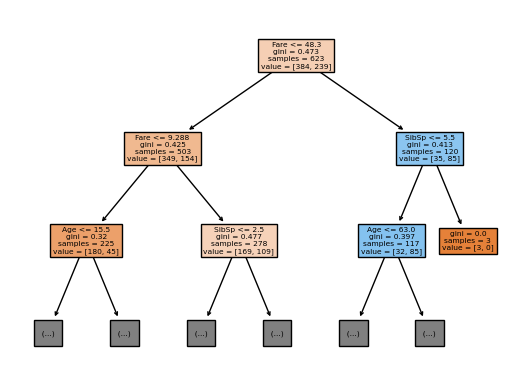

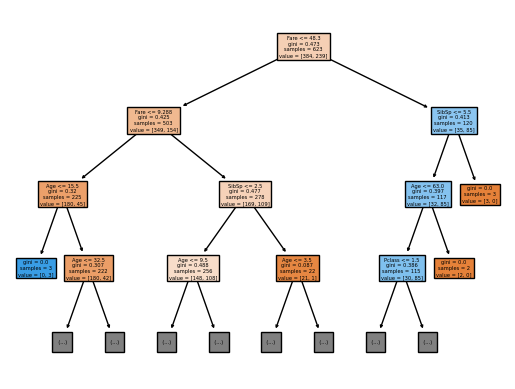

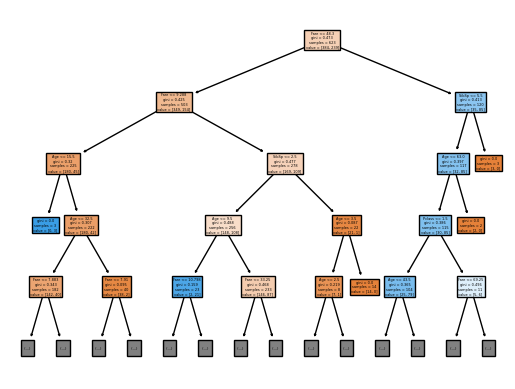

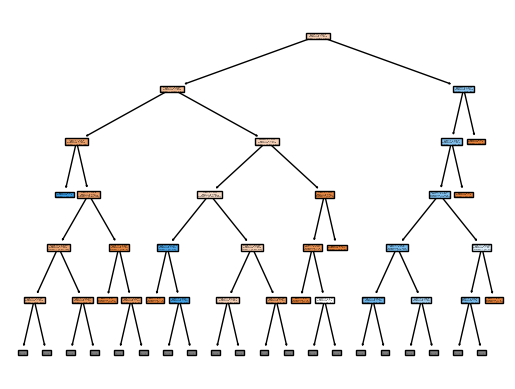

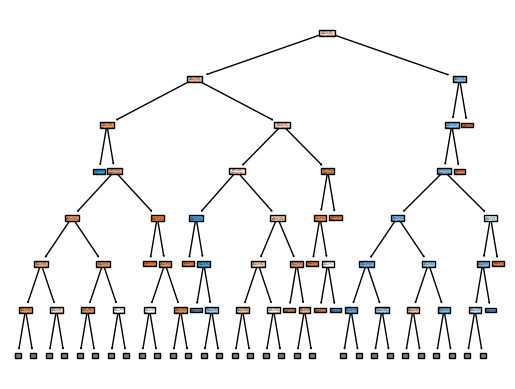

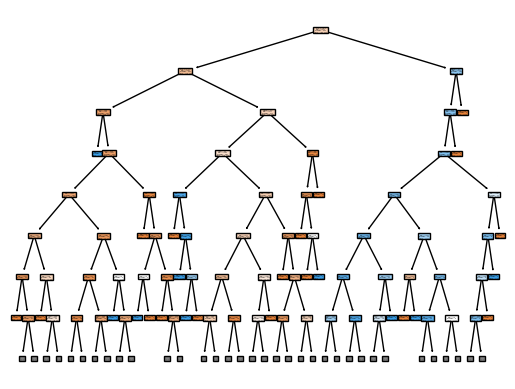

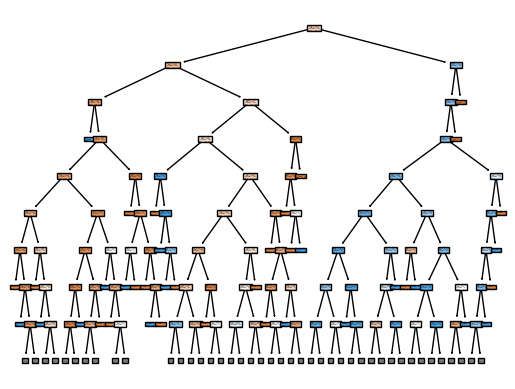

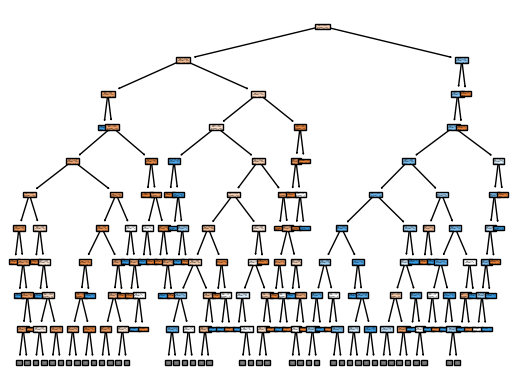

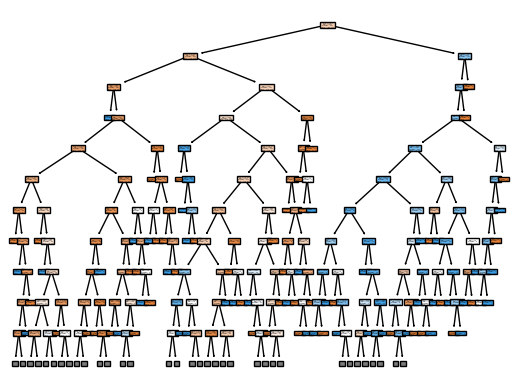

In [32]:
# Creating empty lists to store Development and Training Accuracies.
dev_accuracy = []
train_accuracy = []

depths = range(2,11)

# Calculating accuracies at different tree depths.
for d in depths:
    pruned_model = DecisionTreeClassifier(max_depth=d)
    pruned_model.fit(x_train,y_train)

    print(f"Depth: {d} \t Accuracy: {pruned_model.score(x_dev,y_dev)}")
    dev_accuracy.append(pruned_model.score(x_dev,y_dev))
    train_accuracy.append(pruned_model.score(x_train,y_train))

    # Plotting Decision Tree at different depths.
    fig = plt.figure()
    tree.plot_tree(model, feature_names=features ,max_depth=d, filled=True)

    fig.savefig(f'tree_depth_{d}.png')

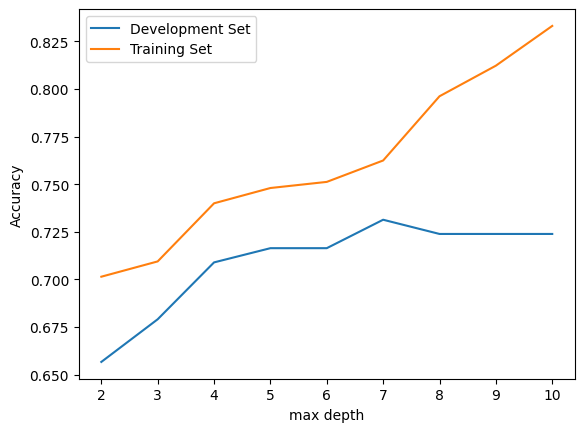

In [33]:
# Plotting graph showing Development and Training Accuracies at different 
# tree depths.
plt.plot(depths, dev_accuracy, label='Development Set')
plt.plot(depths, train_accuracy, label='Training Set')
plt.legend()
plt.xlabel('max depth')
plt.ylabel('Accuracy')
plt.show()

Plot for Training accuracy shows that the accuracy continues to increase for an increase in tree depth.

The plot for the Development accuracy fluctuates for different tree depths. The Development accuracy is much lower than the Training accuracy which could suggest overfitting.

### Final Model

In [34]:
# Picking an optimum depth of the tree based on the depth with the
# highest development accuracy.
optimum_depth = depths[np.argmax(dev_accuracy)]

# Training final model using optimum tree depth.
final_model = DecisionTreeClassifier(max_depth=optimum_depth)
final_model.fit(x_train, y_train)

prediction = final_model.predict(x_test).reshape(-1,1)

print(f"Optimum Depth: {optimum_depth} \t Testing Accuracy: {final_model.score(x_test,y_test)}")


Optimum Depth: 7 	 Testing Accuracy: 0.6865671641791045
